## Logistic Regression

### Programming Exercise 2 - Logistic Regression

In [482]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

#### Visualizing the data

(100, 3)


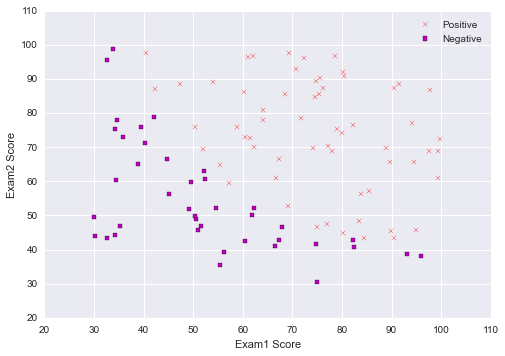

In [483]:
data = np.genfromtxt('ex2data1.txt', delimiter=',')

print(data.shape)

pos = data[data[:,-1]==1] # extract positive samples
neg = data[data[:,-1]==0] # extract negative samples

ax = plt.axes()
ax.scatter(pos[:,0], pos[:,1], c='r', marker="x", label='Positive');
ax.scatter(neg[:,0], neg[:,1], c='m', marker="s", label='Negative');
ax.set_xlabel("Exam1 Score")
ax.set_ylabel("Exam2 Score")
ax.legend();

In [484]:
m, n  = X.shape[0], X.shape[1] - 1
X = np.c_[ np.ones((m, 1)), data[:, :n] ]
y = data[:, n:n+1]
theta = np.zeros( (n+1, 1) ) 

#### Sigmoid function

The logistic regression cost function is defined as $h_{\theta}(x) = g(\theta^T x)$ where the function g is the sigmoid function, which is defined as: $g(z) = \frac{1}{1+e^{-z}}$

In [485]:
import math
import scipy.special

def sigmoid(z):
    return scipy.special.expit(z)
    #return 1 / (1.0 + math.e ** (-1.0 * z))

In [486]:
sigmoid(np.array([0,0,0]))

array([ 0.5,  0.5,  0.5])

#### Cost function

The cost function is defined as:

$J(\theta) = \frac{1}{m} \sum_{n=1}^{m} [-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$

In [518]:
def compute_cost(X, y, theta):
    m = X.shape[0]
    h = sigmoid(X.dot( theta ))
    term1 = np.log( h ).T.dot( -y )
    term2 = np.log(1 - h).T.dot(1 - y)
    return np.sum(((term1 - term2) / m))

In [519]:
compute_cost(X, y, theta)

0.69314718055994518

#### Gradient

The gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for j = 0,1,...,n) is defined as follows:

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{n=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$

In [520]:
def gradient_cost(X, y, theta):
    m = X.shape[0]
    return ( X.T.dot(sigmoid( X.dot( theta ) ) - y)  ) / m

In [521]:
gradient(X, y, theta)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

#### Learning parameters

In [522]:
import scipy.optimize #python equivalent of fminunc in Octave/Matlab

def fit(X, y, theta):
    result = scipy.optimize.fmin( compute_cost, x0=theta, args=(X, y), maxiter=500, full_output=True )
    return result[0], result[1]

In [523]:
theta, cost = fit(X, y, theta)

ValueError: shapes (3,) and (100,1) not aligned: 3 (dim 0) != 100 (dim 0)

#### Plotting the boundary

TODO: Plot the decision boundary